<a href="https://colab.research.google.com/github/sergeiissaev/Recursion-Cellular-Image-Classification/blob/master/Recursion_Cellular_Image_Classification_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Remember to put runtime to TPU!

In [0]:
#imports

import pandas as pd
import json
import os
import sys
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



In [3]:
#import rxrx1-utils
if 'google.colab' in sys.modules:
    !git clone https://github.com/recursionpharma/rxrx1-utils
    sys.path.append('/content/rxrx1-utils')

    from google.colab import auth
    auth.authenticate_user()
    
from rxrx.main import main
import rxrx.io as rio

Cloning into 'rxrx1-utils'...
remote: Enumerating objects: 118, done.
remote: Total 118 (delta 0), reused 0 (delta 0), pack-reused 118
Receiving objects: 100% (118/118), 1.59 MiB | 7.32 MiB/s, done.
Resolving deltas: 100% (59/59), done.


W0801 18:30:30.889582 139982058174336 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [4]:
t = rio.load_site('train', 'RPE-05', 3, 'D19', 1)

t.shape

(512, 512, 6)

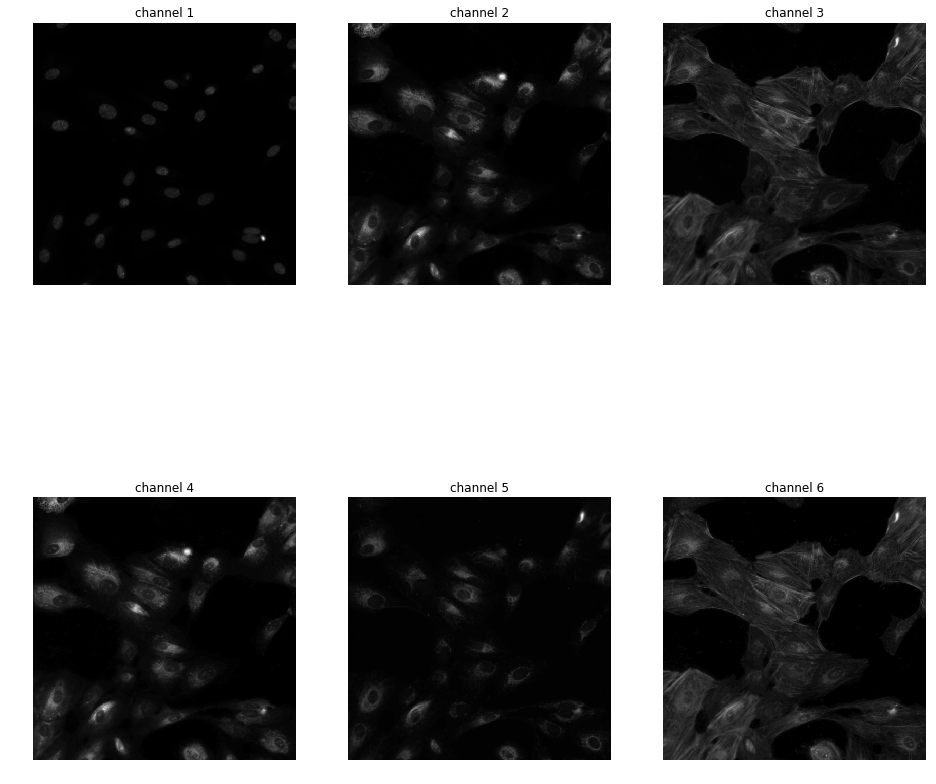

In [5]:
fig, axes = plt.subplots(2, 3, figsize=(16, 16))

for i, ax in enumerate(axes.flatten()):
    ax.axis('off')
    ax.set_title('channel {}'.format(i + 1))
    _ = ax.imshow(t[:, :, i], cmap='gray')

    

In [6]:
x = rio.convert_tensor_to_rgb(t)

x.shape

(512, 512, 3)

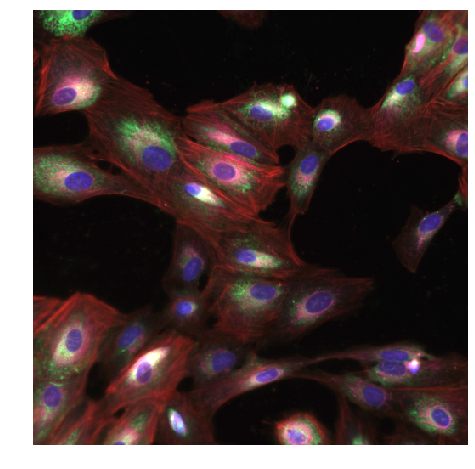

In [7]:
plt.figure(figsize=(8, 8))
plt.axis('off')

_ = plt.imshow(x)

In [8]:


md = rio.combine_metadata()


md.head(10)



,cell_type,dataset,experiment,plate,sirna,site,well,well_type
id_code,,,,,,,,
HEPG2-08_1_B02,HEPG2,test,HEPG2-08,1,1138.0,1,B02,negative_control
HEPG2-08_1_B02,HEPG2,test,HEPG2-08,1,1138.0,2,B02,negative_control
HEPG2-08_1_B03,HEPG2,test,HEPG2-08,1,NaN,1,B03,treatment
HEPG2-08_1_B03,HEPG2,test,HEPG2-08,1,NaN,2,B03,treatment
HEPG2-08_1_B04,HEPG2,test,HEPG2-08,1,NaN,1,B04,treatment
HEPG2-08_1_B04,HEPG2,test,HEPG2-08,1,NaN,2,B04,treatment
HEPG2-08_1_B05,HEPG2,test,HEPG2-08,1,NaN,1,B05,treatment
HEPG2-08_1_B05,HEPG2,test,HEPG2-08,1,NaN,2,B05,treatment
HEPG2-08_1_B06,HEPG2,test,HEPG2-08,1,NaN,1,B06,treatment


In [9]:
md.shape

(125510, 8)

In [10]:
md.index

Index(['HEPG2-08_1_B02', 'HEPG2-08_1_B02', 'HEPG2-08_1_B03', 'HEPG2-08_1_B03',
       'HEPG2-08_1_B04', 'HEPG2-08_1_B04', 'HEPG2-08_1_B05', 'HEPG2-08_1_B05',
       'HEPG2-08_1_B06', 'HEPG2-08_1_B06',
       ...
       'U2OS-03_4_O19', 'U2OS-03_4_O19', 'U2OS-03_4_O20', 'U2OS-03_4_O20',
       'U2OS-03_4_O21', 'U2OS-03_4_O21', 'U2OS-03_4_O22', 'U2OS-03_4_O22',
       'U2OS-03_4_O23', 'U2OS-03_4_O23'],
      dtype='object', name='id_code', length=125510)

In [11]:
md.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125510 entries, HEPG2-08_1_B02 to U2OS-03_4_O23
Data columns (total 8 columns):
cell_type     125510 non-null object
dataset       125510 non-null object
experiment    125510 non-null object
plate         125510 non-null int64
sirna         85716 non-null float64
site          125510 non-null int64
well          125510 non-null object
well_type     125510 non-null object
dtypes: float64(1), int64(2), object(5)
memory usage: 8.6+ MB


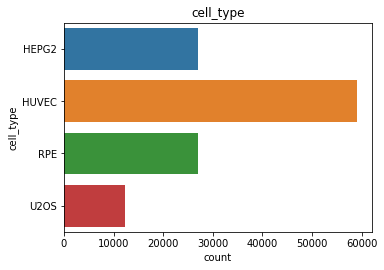

In [12]:
plt.figure(figsize= (5,10))
plt.subplot(311)
plt.title('cell_type')
plt.tight_layout()
sns.countplot(y =md['cell_type'])

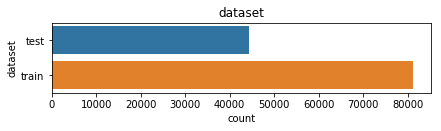

In [13]:
plt.subplot(312)
plt.title('dataset')
plt.tight_layout()
sns.countplot(y = md['dataset'])

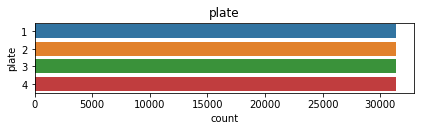

In [14]:
plt.subplot(312)
plt.title('plate')
plt.tight_layout()
sns.countplot(y = md['plate'])

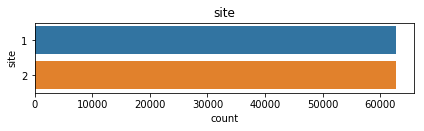

In [15]:
plt.subplot(312)
plt.title("site")
plt.tight_layout()
sns.countplot(y = md['site'])

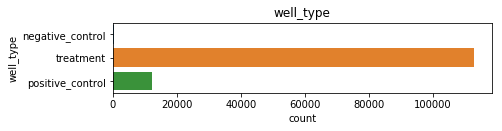

In [16]:
plt.subplot(312)
plt.title('well_type')
plt.tight_layout()
sns.countplot(y = md['well_type'])

In [17]:
#unique values
for i in md.columns:
    print (">> ",i,"\t", md[i].unique())

>>  cell_type 	 ['HEPG2' 'HUVEC' 'RPE' 'U2OS']
>>  dataset 	 ['test' 'train']
>>  experiment 	 ['HEPG2-08' 'HEPG2-09' 'HEPG2-10' 'HEPG2-11' 'HUVEC-17' 'HUVEC-18'
 'HUVEC-19' 'HUVEC-20' 'HUVEC-21' 'HUVEC-22' 'HUVEC-23' 'HUVEC-24'
 'RPE-08' 'RPE-09' 'RPE-10' 'RPE-11' 'U2OS-04' 'U2OS-05' 'HEPG2-01'
 'HEPG2-02' 'HEPG2-03' 'HEPG2-04' 'HEPG2-05' 'HEPG2-06' 'HEPG2-07'
 'HUVEC-01' 'HUVEC-02' 'HUVEC-03' 'HUVEC-04' 'HUVEC-05' 'HUVEC-06'
 'HUVEC-07' 'HUVEC-08' 'HUVEC-09' 'HUVEC-10' 'HUVEC-11' 'HUVEC-12'
 'HUVEC-13' 'HUVEC-14' 'HUVEC-15' 'HUVEC-16' 'RPE-01' 'RPE-02' 'RPE-03'
 'RPE-04' 'RPE-05' 'RPE-06' 'RPE-07' 'U2OS-01' 'U2OS-02' 'U2OS-03']
>>  plate 	 [1 2 3 4]
>>  sirna 	 [1138.   nan 1137. ...  568.  978.  176.]
>>  site 	 [1 2]
>>  well 	 ['B02' 'B03' 'B04' 'B05' 'B06' 'B07' 'B08' 'B09' 'B10' 'B11' 'B12' 'B13'
 'B14' 'B15' 'B16' 'B17' 'B18' 'B19' 'B20' 'B21' 'B22' 'B23' 'C02' 'C03'
 'C04' 'C05' 'C06' 'C07' 'C08' 'C09' 'C10' 'C11' 'C12' 'C13' 'C14' 'C15'
 'C16' 'C17' 'C18' 'C19' 'C20' 'C21' 'C

In [18]:
#Missing values
missing_count = md.isnull().sum()
missing_count

cell_type         0
dataset           0
experiment        0
plate             0
sirna         39794
site              0
well              0
well_type         0
dtype: int64

In [19]:
#fill in missing values
md = md.fillna(0)
md.head()

,cell_type,dataset,experiment,plate,sirna,site,well,well_type
id_code,,,,,,,,
HEPG2-08_1_B02,HEPG2,test,HEPG2-08,1,1138.0,1,B02,negative_control
HEPG2-08_1_B02,HEPG2,test,HEPG2-08,1,1138.0,2,B02,negative_control
HEPG2-08_1_B03,HEPG2,test,HEPG2-08,1,0.0,1,B03,treatment
HEPG2-08_1_B03,HEPG2,test,HEPG2-08,1,0.0,2,B03,treatment
HEPG2-08_1_B04,HEPG2,test,HEPG2-08,1,0.0,1,B04,treatment


In [20]:
#split into train and test
train_df = md[md["dataset"] == "train"]
test_df = md[md["dataset"] == "test"]
train_df.shape, test_df.shape

((81224, 8), (44286, 8))

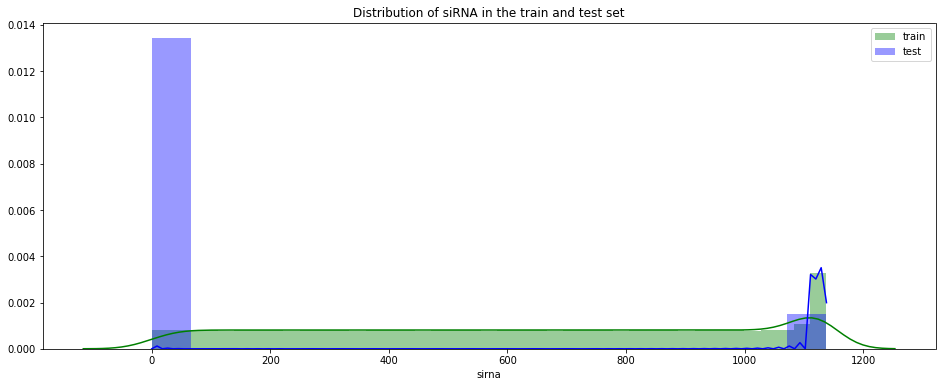

In [21]:
#siRNA distribution for train and test sets
plt.figure(figsize=(16,6))
plt.title("Distribution of siRNA in the train and test set")
sns.distplot(train_df.sirna,color="green", kde=True,bins='auto', label='train')
sns.distplot(test_df.sirna,color="blue", kde=True, bins='auto', label='test')
plt.legend()
plt.show()

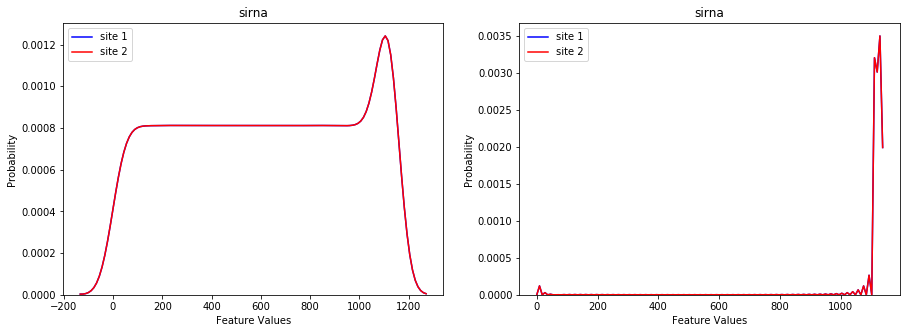

In [24]:
feat1 = 'sirna'
fig = plt.subplots(figsize=(15, 5))

# train data
plt.subplot(1, 2, 1)
sns.kdeplot(train_df[feat1][train_df['site'] == 1], shade=False, color="b", label = 'site 1')
sns.kdeplot(train_df[feat1][train_df['site'] == 2], shade=False, color="r", label = 'site 2')
plt.title(feat1)
plt.xlabel('Feature Values')
plt.ylabel('Probability')

# test data
plt.subplot(1, 2, 2)
sns.kdeplot(test_df[feat1][test_df['site'] == 1], shade=False, color="b", label = 'site 1')
sns.kdeplot(test_df[feat1][test_df['site'] == 2], shade=False, color="r", label = 'site 2')
plt.title(feat1)
plt.xlabel('Feature Values')
plt.ylabel('Probability')
plt.show()